In [1]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 8)
import pandas as pd
ti = TechIndicators(key='LJQX8580YS8GDLSL', output_format='pandas')

In [5]:
ticker = 'SGH'
ti.get_dx(symbol=ticker, interval='15min')

(                       DX
 date                     
 2018-04-19 14:30   0.0180
 2018-04-19 14:45   4.1772
 2018-04-19 15:00   4.1772
 2018-04-19 15:15   8.7032
 2018-04-19 15:30   0.0022
 2018-04-19 15:45   4.5956
 2018-04-19 16:00   3.0387
 2018-04-20 09:30   1.7631
 2018-04-20 09:45  14.5734
 2018-04-20 10:00   2.3850
 2018-04-20 10:15   2.2752
 2018-04-20 10:30   1.4360
 2018-04-20 10:45   1.7170
 2018-04-20 11:00  12.2410
 2018-04-20 11:15  20.6532
 2018-04-20 11:30  26.0723
 2018-04-20 11:45  21.5039
 2018-04-20 12:00  21.5039
 2018-04-20 12:15  23.3773
 2018-04-20 12:30  28.3754
 2018-04-20 12:45  28.3754
 2018-04-20 13:00  19.4002
 2018-04-20 13:15  11.5095
 2018-04-20 13:30   6.6344
 2018-04-20 13:45   8.6807
 2018-04-20 14:00   8.6807
 2018-04-20 14:15  12.9105
 2018-04-20 14:30  15.0841
 2018-04-20 14:45  19.7525
 2018-04-20 15:00  19.7525
 ...                   ...
 2018-05-01 14:45  46.2105
 2018-05-01 15:00  46.2105
 2018-05-01 15:15  41.2742
 2018-05-01 15:30  41.2742
 

In [2]:
ticker = 'SGH'
data, meta_data = ti.get_macd(symbol=ticker, interval='daily')
data.index = pd.to_datetime(data.index)
data.tail()

,MACD_Hist,MACD,MACD_Signal
date,,,
2018-04-26 00:00:00,-0.8666,-0.8550,0.0116
2018-04-27 00:00:00,-0.8325,-1.0291,-0.1966
2018-04-30 00:00:00,-0.7562,-1.1418,-0.3856
2018-05-01 00:00:00,-0.5727,-1.1015,-0.5288
2018-05-02 14:11:21,-0.4871,-1.1377,-0.6506


{'1: Symbol': 'SGH',
 '2: Indicator': 'Bollinger Bands (BBANDS)',
 '3: Last Refreshed': '2018-04-19 12:02:06',
 '4: Interval': 'daily',
 '5: Time Period': 20,
 '6.1: Deviation multiplier for upper band': 2,
 '6.2: Deviation multiplier for lower band': 2,
 '6.3: MA Type': 0,
 '7: Series Type': 'close',
 '8: Time Zone': 'US/Eastern Time'}

Text(0.5,1,'SGH')

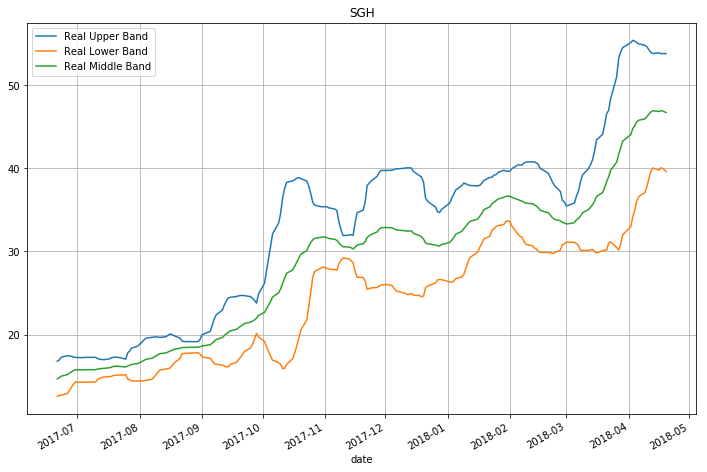

,Real Upper Band,Real Lower Band,Real Middle Band
count,209.000000,209.000000,209.000000
mean,33.088880,24.119206,28.604046
std,11.004263,7.424105,8.969442
min,16.798100,12.556900,14.677500
25%,20.379400,16.585600,18.770700
50%,35.906700,25.720300,31.074500
75%,39.680100,30.155800,34.396800
max,55.397300,40.077500,46.937000


,Real Upper Band,Real Lower Band,Real Middle Band
date,,,
2018-04-13 00:00:00,53.8136,40.0474,46.9305
2018-04-16 00:00:00,53.8981,39.7959,46.8470
2018-04-17 00:00:00,53.7965,40.0775,46.9370
2018-04-18 00:00:00,53.8181,39.9579,46.8880
2018-04-19 12:02:06,53.8089,39.6191,46.7140


In [7]:

data, meta_data = ti.get_bbands(symbol=ticker, interval='60min', time_period=60)
data, meta_data = ti.get_bbands(symbol=ticker)
data.index = pd.to_datetime(data.index)
meta_data
data.plot();
plt.title(ticker)
plt.grid()
plt.show();
data.describe()
data.tail()

### Bolinger Bands
<pre>
Signature: ti.get_bbands(symbol, interval='daily', time_period=20, series_type='close', nbdevup=None, nbdevdn=None, matype=None)
Docstring:
Return the bollinger bands values in two
json objects as data and meta_data. It raises ValueError when problems
arise

Keyword Arguments:
    symbol:  the symbol for the equity we want to get its data
    interval:  time interval between two conscutive values,
        supported values are '1min', '5min', '15min', '30min', '60min', 'daily',
        'weekly', 'monthly' (default 'daily'
    series_type:  The desired price type in the time series. Four types
        are supported: 'close', 'open', 'high', 'low' (default 'close')
    nbdevup:  The standard deviation multiplier of the upper band. Positive
        integers are accepted as default (default=2)
    nbdevdn:  The standard deviation multiplier of the lower band. Positive
        integers are accepted as default (default=2)
    matype :  Moving average type. By default, matype=0.
        Integers 0 - 8 are accepted (check  down the mappings) or the string
        containing the math type can also be used.

        * 0 = Simple Moving Average (SMA),
        * 1 = Exponential Moving Average (EMA),
        * 2 = Weighted Moving Average (WMA),
        * 3 = Double Exponential Moving Average (DEMA),
        * 4 = Triple Exponential Moving Average (TEMA),
        * 5 = Triangular Moving Average (TRIMA),
        * 6 = T3 Moving Average,
        * 7 = Kaufman Adaptive Moving Average (KAMA),
        * 8 = MESA Adaptive Moving Average (MAMA)
File:      /Environments/anaconda/envs/py3/lib/python3.6/site-packages/alpha_vantage/techindicators.py
Type:      method
</pre>